# Student Performance In Exams
- DataSet : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- Problem Statement : To understand the influence of the parents background, test preparation etc on students performance.
### **Columns Description:**
- **gender**: Gender of the student (male/female).  
- **race/ethnicity**: The racial or ethnic group the student belongs to (e.g., group A, group B, etc.).  
- **parental level of education**: The highest education level attained by the student's parent(s) (e.g., high school, bachelor's degree, master's degree, etc.).  
- **lunch**: Type of lunch plan the student receives (standard or free/reduced).  
- **test preparation course**: Whether the student completed a test preparation course (none or completed).  
- **math score**: Student’s score in the math section.  
- **reading score**: Student’s score in the reading section.  
- **writing score**: Student’s score in the writing section.  

### importing Necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# importing and reading the dataset.

In [7]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA and Checking for missing and duplicated values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.shape

(1000, 8)

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### we can see that the mean and standard deviation of the 3 numerical features are so close and the distribution of the data is almost the same.

In [19]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

#### there is no missing or duplicated values in the dataset.

In [29]:
print('number of students with full mark in math :',df[df['math score'] == 100].shape[0])
print('number of students with full mark in reading :',df[df['reading score'] == 100].shape[0])
print('number of students with full mark in writing :',df[df['writing score'] == 100].shape[0])

number of students with full mark in math : 7
number of students with full mark in reading : 17
number of students with full mark in writing : 14


#### We can see that the subject with the most full marks is reading , and the least subject is math.

In [35]:
print('number of students that didn\'t pass in math :',df[df['math score'] < 50].shape[0])
print('number of students that didn\'t pass in reading :',df[df['reading score'] < 50].shape[0])
print('number of students that didn\'t pass in writing :',df[df['writing score'] < 50].shape[0])

number of students that didn't pass in math : 135
number of students that didn't pass in reading : 90
number of students that didn't pass in writing : 114


#### math followed by writing have the most students that didn't exam.

### Let's Check our categorical features.

In [42]:
categorical_fets = [feature for feature in df.columns if df[feature].dtype =='O']
categorical_fets

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [49]:
for feature in categorical_fets:
    print(f'number of unique values in {feature} : {df[feature].nunique()}')

number of unique values in gender : 2
number of unique values in race/ethnicity : 5
number of unique values in parental level of education : 6
number of unique values in lunch : 2
number of unique values in test preparation course : 2


In [51]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [52]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### We can make high school and some high school the same vlaue "high school"

In [108]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [110]:
df['parental level of education'].replace('some high school','high school',inplace=True)

### Feature engineering

- we can extract a total_score and average_score feature from the three subject scores.

In [126]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

### Check for outliers

<Axes: xlabel='average_score'>

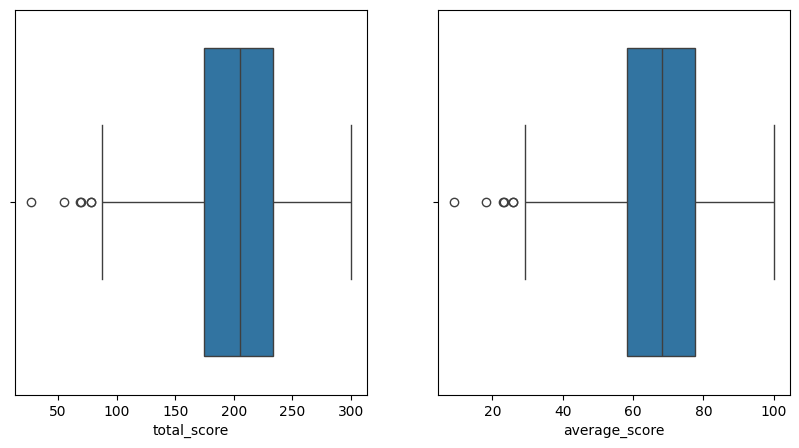

In [120]:
f ,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(df,x='total_score',ax=ax[0])
sns.boxplot(df,x='average_score',ax=ax[1])

### we can see there is outliers present we should handle it because it will impact our model.

## Data Visualization

<Axes: title={'center': 'Number of Males and Females.'}, xlabel='gender', ylabel='count'>

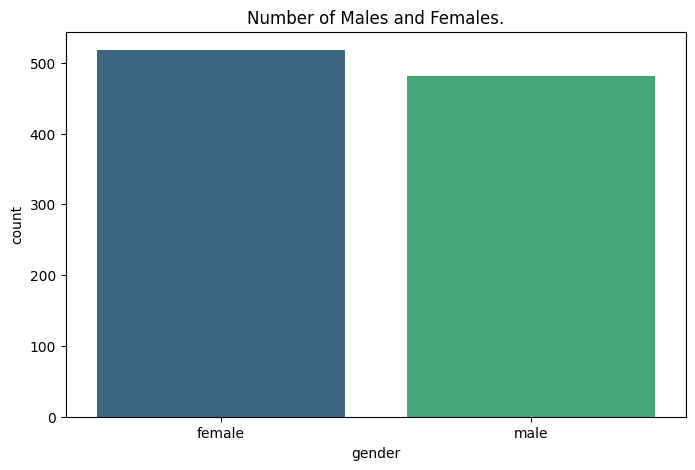

In [122]:
plt.figure(figsize=(8, 5))
plt.title('Number of Males and Females.')
sns.countplot(df,x='gender', palette='viridis')

#### Number of male and females almost the same

<Axes: title={'center': 'Total score distribution in terms of gender.'}, xlabel='total_score', ylabel='Count'>

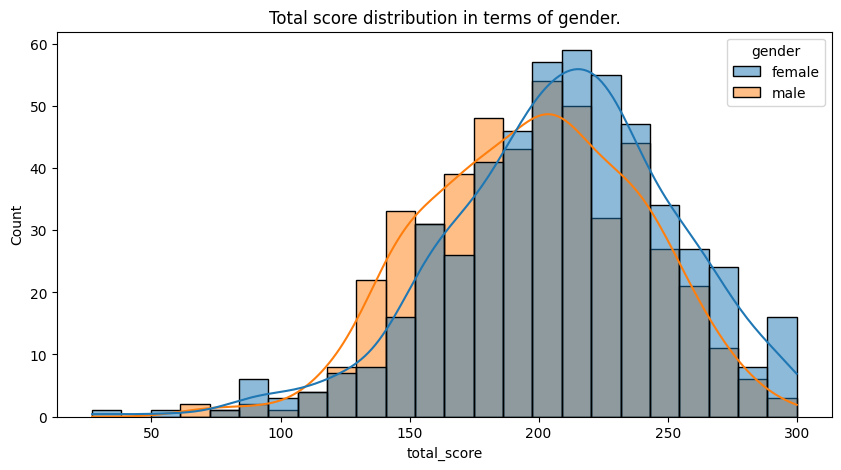

In [123]:
plt.figure(figsize=(10,5))
plt.title('Total score distribution in terms of gender.')
sns.histplot(data=df,x='total_score',kde=True,hue='gender')

#### The total scores across subjects indicate that female students, on average, outperform male students

<Axes: title={'center': 'Total score in terms of students who took preparation course.'}, xlabel='test preparation course', ylabel='total_score'>

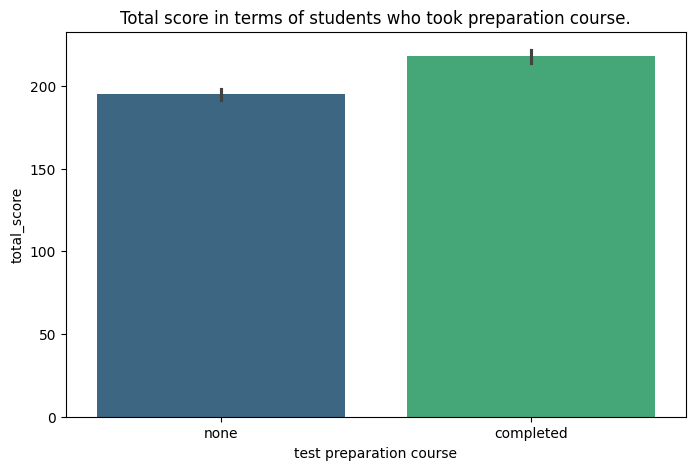

In [124]:
plt.figure(figsize=(8, 5))
plt.title('Total score in terms of students who took preparation course.')
sns.barplot(df,x='test preparation course', y='total_score', palette='viridis')

#### the students that took the preparation course tend to achieve more score than those who didn't take it.

<Axes: title={'center': 'total score in terms of race and ethnicity.'}, xlabel='race/ethnicity', ylabel='total_score'>

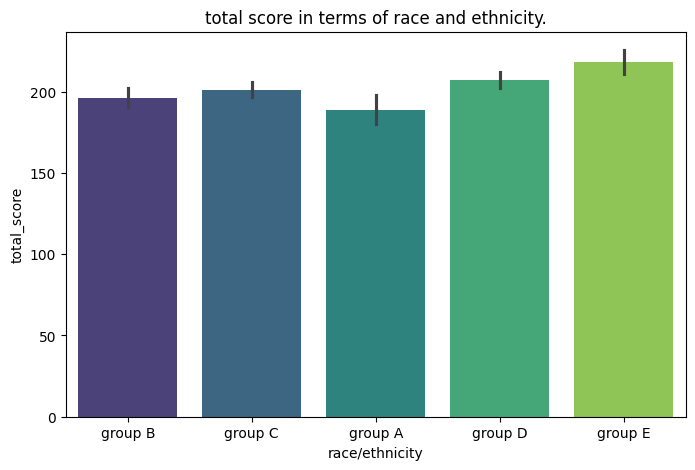

In [125]:
plt.figure(figsize=(8, 5))
plt.title('total score in terms of race and ethnicity.')
sns.barplot(df,x='race/ethnicity', y='total_score', palette='viridis')

#### the bar plot indicates that Group E outperforms the rest of the groups and group A tends to perform poorly than the rest.

<Axes: xlabel='total_score', ylabel='Count'>

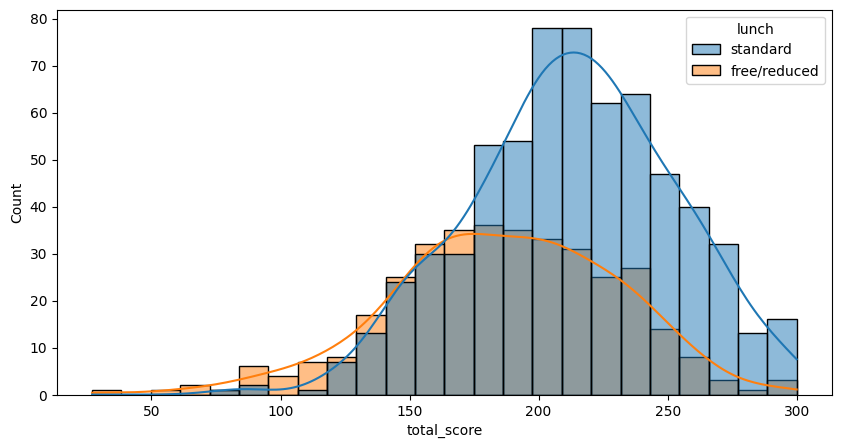

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='total_score',kde=True,hue='lunch')

### students with standard launch outperforms free/reduced on average.

[]

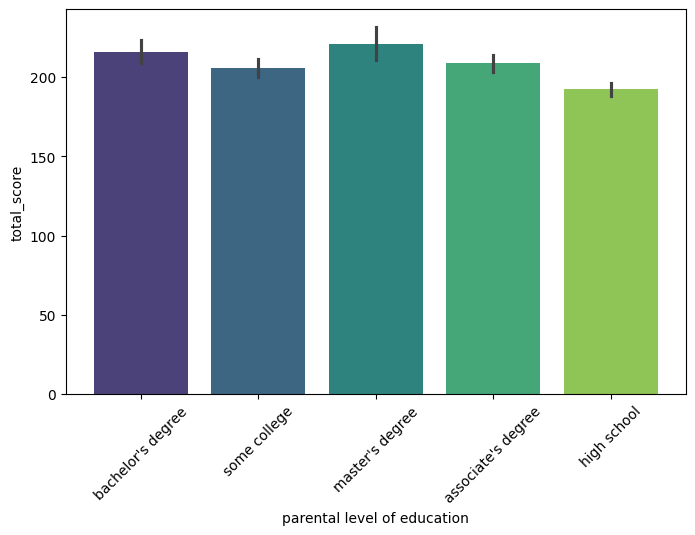

In [111]:
plt.figure(figsize=(8, 5))
sns.barplot(df,x='parental level of education', y='total_score', palette='viridis')
plt.xticks(rotation=45)
plt.plot()

#### Students whose parents have higher levels of education tend to achieve higher total scores. Specifically, students with parents holding a master's or bachelor's degree score the highest on average, while those whose parents only completed high school have the lowest total scores

## Conclusion

- student's performance is related to launch , race , parental education and preparation course.
- females outperforms males regarding total scores.